# Research Question

Using a [TMDb movie data set](https://www.kaggle.com/datasets/juzershakir/tmdb-movies-dataset) containing various properties of movies released between 1960 and 2015, I explored what are related to financial success of movies.

In this analysis, I intend to find properties related to financial success of movies. In assessing the financial success, I will use **Return on Investment (ROI)**, a measure commonly used in describing profitability. It is calculated by: ROI = (gross revenue - cost)/cost.

I chose movies' budget sizes, genres, and vote scores, as potential properties to explore. In other words, to answer **"what properties are associated with profitable movies based on ROI?"**, I will investigate: 

1. Did high budget movies achieve high ROI?
2. Did specific genres lead to high ROI?
3. Did high score movies achieve high ROI?

**Table of Contents:**
1. Overview of the Dataset
2. Data Wrangling
3. Explore Individual Variables
4. Did high budget movies achieve high ROI? (Q1)
5. Did specific genres lead to high ROI? (Q2)
6. Did high score movies achieve high ROI? (Q3)
7. Conclusions

# 1. Overview of the Dataset<a class="anchor" id="ch1"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# settings to display all columns
pd.set_option("display.max_columns", None)

In [3]:
# Load dataset
df = pd.read_csv("_data/tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In this section, I loaded the dataset and checked structure and quality of it. Especially, the following was noted:
- Two columns, 'id' and 'imdb_id', are candidates for a key. But, since 'imdb_id' has null values, 'id' is considered adequate as a key,
- For budget and revenue, the dataset stores values adjusted to inflation as well as original numbers,
- For budget and revenue, many records have number 0, which is considered not valid,
- There are 23 nulls in 'genre' column,
- Rather than a single genre, many movies are described with multiple genres, e.g., 'Action|Adventure|Science Fiction', and
- 'vote_average' column has no nulls, ranging between 1.5 and 9.2.

Note: 'budget_adj', 'revenue_adj', 'genres', and 'vote_scores' columns are related to the research questions.  

# 2. Data Wrangling<a class="anchor" id="ch2"></a>

This section addresses: 
1. Duplicated records
2. Missing values
3. Incorrect values
4. Calculation of ROI
5. Datatypes
6. Columns irrelevant to the analysis
7. Outliers

## 2.1. Duplicates

In [6]:
df['id'].nunique()

10865

The output is one fewer than the toal number of entries (10866), which means there is a duplicate. 

In [7]:
# To find duplicated 'id's
df[df.duplicated(['id'], keep = False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
# Two identical records found above. To delete one of them:
df.drop(index = 2090, inplace = True)
df.shape

(10865, 21)

In [9]:
# To find movies with the same title, director, and release year
df[df.duplicated(['original_title', 'director', ], keep = False)]\
    [['original_title', 'director', 'release_year', 'runtime']].sort_values(by=['original_title'])

,original_title,director,release_year,runtime
1400,9,Shane Acker,2009,79
6514,9,Shane Acker,2005,11
4337,Bottle Rocket,Wes Anderson,1994,13
8547,Bottle Rocket,Wes Anderson,1996,91
4451,Frankenweenie,Tim Burton,2012,87
7943,Frankenweenie,Tim Burton,1984,29
4063,Madea's Family Reunion,Tyler Perry,2002,0
6701,Madea's Family Reunion,Tyler Perry,2006,110
5202,Saw,James Wan,2003,9
7011,Saw,James Wan,2004,103


Duplicates? But, I googled and found that it can happen; e.g., a director makes a 'mini' version before the full scale. Thus, these records are kept for the analysis. 

## 2.2. Missing values

In this part, I first checked the number of valid records, that is, records having values for all the variables of interest. It turned out only 3854 records are valid. Although it leaves only about 35% of the whole dataset, I just dropped invalid records without any further effort.

In [10]:
df['genres'].isnull().sum()

23

In [11]:
len(df[df['budget_adj']==0]), len(df[df['revenue_adj']==0])

(5696, 6016)

In [12]:
# Number of valid records
len(df[(df['budget_adj']!=0) & (df['revenue_adj']!=0) & 
       df['genres'].notnull()])

3854

In [13]:
df.dropna(subset = ['genres'], inplace = True)

In [14]:
df['budget_adj'].replace({0: np.nan}, inplace=True)
df['revenue_adj'].replace({0: np.nan}, inplace=True)
df.dropna(subset = ['budget_adj', 'revenue_adj'], inplace = True)

## 2.3. Unused columns

In [15]:
df.drop(columns = ['imdb_id', 'popularity',
                   'cast', 'homepage', 'director', 'tagline', 
                   'keywords', 'overview', 'runtime', 'production_companies', 
                  'release_date', 'vote_count'], 
        inplace = True)
df.shape

(3854, 9)

## 2.4. Incorrect values

### 2.4.1. The most budget

In [16]:
df[df['budget_adj'] == df['budget_adj'].max()]

,id,budget,revenue,original_title,genres,vote_average,release_year,budget_adj,revenue_adj
2244,46528,425000000,11087569,The Warrior's Way,Adventure|Fantasy|Action|Western|Thriller,6.4,2010,425000000.0,11087569.0


In [17]:
# Online search reveals that budget of 'The Warrior's Way' is 42.5 million, not 425 million.
# Thus, to correct it:
df.loc[df['id'] == 46528, 'budget_adj'] = 42500000
df[df['budget_adj'] == df['budget_adj'].max()]

,id,budget,revenue,original_title,genres,vote_average,release_year,budget_adj,revenue_adj
3375,1865,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Adventure|Action|Fantasy,6.3,2011,3.683713e+08,9.904175e+08


### 2.4.2. The most revenue

In [18]:
df[df['revenue_adj'] == df['revenue_adj'].max()] 
# The result is correct; Avatar gained the most revenue.

,id,budget,revenue,original_title,genres,vote_average,release_year,budget_adj,revenue_adj
1386,19995,237000000,2781505847,Avatar,Action|Adventure|Fantasy|Science Fiction,7.1,2009,2.408869e+08,2.827124e+09


### 2.4.3. The least budget

In [19]:
df.sort_values(by = 'budget_adj').head()

,id,budget,revenue,original_title,genres,vote_average,release_year,budget_adj,revenue_adj
3581,59296,1,1378,"Love, Wedding, Marriage",Comedy|Romance,5.3,2011,0.969398,1335.830503
2618,39964,1,100,Lost & Found,Comedy|Romance,4.8,1999,1.309053,130.905285
2398,39356,3,43,Boy,Drama|Comedy,7.3,2010,3.000000,43.000000
8944,14373,2,16,Death Wish 2,Action|Crime|Thriller,5.6,1982,4.519285,36.154278
10050,20701,3,16,Tales from the Darkside: The Movie,Fantasy|Horror|Comedy,5.8,1990,5.006696,26.702377


Given the above showing existence of many movies with extremely low budget, I googled to get a sense of how much low is reasonably low. Given the above showing existence of many movies with extremely low budget, I googled to get a sense of how much low is reasonably low. Finally, I found that $7000 (budget of 'Primer'(2004)) may be the lowest (https://en.wikipedia.org/wiki/Low-budget_film).

In [20]:
df[df['budget_adj'] < 10000].sort_values(by = 'budget_adj')

,id,budget,revenue,original_title,genres,vote_average,release_year,budget_adj,revenue_adj
3581,59296,1,1378,"Love, Wedding, Marriage",Comedy|Romance,5.3,2011,0.969398,1.335831e+03
2618,39964,1,100,Lost & Found,Comedy|Romance,4.8,1999,1.309053,1.309053e+02
2398,39356,3,43,Boy,Drama|Comedy,7.3,2010,3.000000,4.300000e+01
8944,14373,2,16,Death Wish 2,Action|Crime|Thriller,5.6,1982,4.519285,3.615428e+01
10050,20701,3,16,Tales from the Darkside: The Movie,Fantasy|Horror|Comedy,5.8,1990,5.006696,2.670238e+01
8235,25066,6,11,Tales from the Hood,Horror|Thriller,5.1,1995,8.585801,1.574064e+01
5852,217708,10,11,Hross Ã­ oss,Drama|Romance|Comedy,6.5,2013,9.360334,1.029637e+01
8125,11980,8,16,The Prophecy,Fantasy|Horror|Thriller,5.5,1995,11.447735,2.289547e+01
5162,24914,10,5,Kid's Story,Science Fiction|Animation,6.8,2003,11.853526,5.926763e+00
10297,9644,8,27,National Lampoon's Loaded Weapon 1,Comedy,5.5,1993,12.075760,4.075569e+01


The above output shows the movie, 'Primer', with \\$8081, approximately the same to the wikipedia information. But, there are movies made with lower budget. So I checked some of them, and turned out many are incorrect. For example, the budget of 'Lost & Found'(1999) is \\$30 million, not \\$1.3, 'Joyful Noise' (2012), \\$25 millon, not \\$23, and 'Weekend'(2011), \\$0.14 millon, not \\$7755. 

Although I did not check all of them, I think it is enough to distrust records with budget lower than $8081. I am going to remove them. 

References:
* https://en.wikipedia.org/wiki/Lost_%26_Found_(1999_film)
* https://en.wikipedia.org/wiki/Joyful_Noise_(film)
* https://en.wikipedia.org/wiki/Weekend_(2011_film)

In [21]:
# Remove movies whose budget are lower than 'Primer' budget ($8081.117799)
df = df[df['budget_adj'] > 8081]
df.shape

(3830, 9)

### 2.4.4. The least revenue

In [22]:
df[df['revenue_adj'] < 5000].sort_values(by = 'revenue_adj')

,id,budget,revenue,original_title,genres,vote_average,release_year,budget_adj,revenue_adj
5067,13537,6000000,2,Shattered Glass,Drama|History,6.4,2003,7.112116e+06,2.370705
8142,2293,6000000,2,Mallrats,Romance|Comedy,6.8,1995,8.585801e+06,2.861934
3239,14301,200000,3,Dr. Horrible's Sing-Along Blog,Adventure|Action|Comedy|Science Fiction|Music,7.7,2008,2.025573e+05,3.038360
8523,9431,15000000,5,Bordello of Blood,Horror|Comedy,4.9,1996,2.085325e+07,6.951084
8226,48781,6400000,6,Never Talk to Strangers,Thriller|Romance,4.5,1995,9.158188e+06,8.585801
10307,2259,25000000,6,The House of the Spirits,Romance|Drama,6.7,1993,3.773675e+07,9.056820
7158,14844,23000000,12,Chasing Liberty,Comedy|Romance,6.2,2004,2.655224e+07,13.853345
10294,10285,3000000,15,Jason Goes to Hell: The Final Friday,Horror|Thriller,3.9,1993,4.528410e+06,22.642049
5060,10944,12000000,23,In the Cut,Thriller|Mystery,4.7,2003,1.422423e+07,27.263111
7506,2196,9000000,46,Death at a Funeral,Comedy|Drama,6.7,2007,9.465017e+06,48.376755


With online search, I checked some movies whose revenue is lower than revenue of "Best Man Down", and found they are totally wrong. Although I did not check all the moives lower than "Best Man Down", I am going to exclude all those movies. 

In [23]:
df = df[df['budget_adj'] > 1000]
df.shape

(3830, 9)

## 2.5. Calculation of ROI

In [24]:
df['ROI'] = df.apply(lambda x: (x.revenue_adj - x.budget_adj)/x.budget_adj, axis=1)

## 2.5. Transformaton of data type
String values for the 'genres' column are converted to the list type. The other columns are considered set suitably.

In [25]:
# Convert 'genres' values from strings to lists, which may make later work easier.
df.loc[:, 'genres'] = df['genres'].str.strip().str.split("|")

In [26]:
type(df['genres'].iloc[0])

list

## 2.7. Outliers

I will inspect each variable with visualization to identify records to remove.

### 2.7.1. Budget

In [27]:
plt.style.use('seaborn')
plt.rcParams.update({'axes.titlesize': 'x-large'})

[Text(0.5, 0, 'Budget'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Histogram of Budget')]

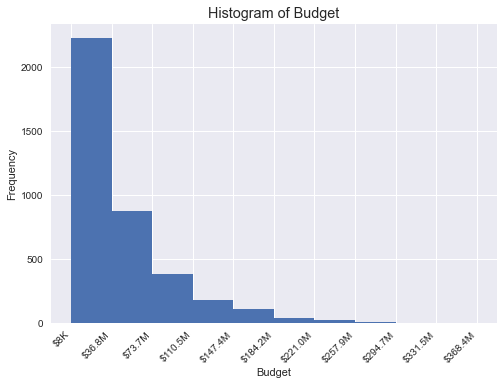

In [28]:
# This function was copied from 'The Lifecycle of a Plot', 
# https://matplotlib.org/stable/tutorials/introductory/lifecycle.html
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

ax = plt.axes()

n, bins, patches = plt.hist(df['budget_adj'])
ax.set_xticks(bins)
ax.xaxis.set_major_formatter(currency)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Budget', ylabel='Frequency',
       title='Histogram of Budget')

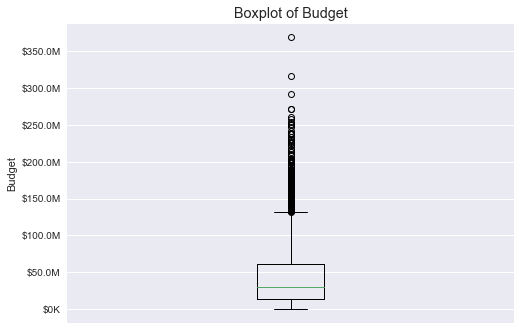

In [29]:
ax = plt.axes()
plt.boxplot(df['budget_adj'])
ax.set(ylabel='Budget',
       title='Boxplot of Budget')

ax.yaxis.set_major_formatter(currency)
ax.set_xticks([]);

In [30]:
temp = df['budget_adj'].sort_values(ascending = False).reset_index()
temp['diff'] = temp['budget_adj'].diff(periods = -1)
temp['ratio'] = temp['diff'] / temp['budget_adj']

In [31]:
temp

,index,budget_adj,diff,ratio
0,3375,3.683713e+08,5.287068e+07,0.143526
1,7387,3.155006e+08,2.344990e+07,0.074326
2,6570,2.920507e+08,2.035861e+07,0.069709
3,5231,2.716921e+08,3.615699e+05,0.001331
4,7394,2.713305e+08,1.133049e+07,0.041759
...,...,...,...,...
3825,2227,3.000000e+04,0.000000e+00,0.000000
3826,2207,3.000000e+04,1.352023e+04,0.450674
3827,3785,1.647977e+04,7.047380e+02,0.042764
3828,7447,1.577503e+04,7.693911e+03,0.487727


Although the top three records are off from their nearest smaller record, I do not consider that the distances are far enough. I am going to keep them. 

### 2.7.2. Genres

In [32]:
# Generate a long format dataframe 
df_long = df.explode('genres')

# Count the number of inclusion of each genre.
df_long['genres'].value_counts()

Drama              1746
Comedy             1347
Thriller           1197
Action             1078
Adventure           746
Romance             660
Crime               649
Science Fiction     518
Horror              460
Family              423
Fantasy             393
Mystery             344
Animation           200
Music               134
History             129
War                 119
Western              52
Documentary          34
Foreign              13
TV Movie              1
Name: genres, dtype: int64

[Text(0.5, 0, 'Budget'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Histogram of Budget')]

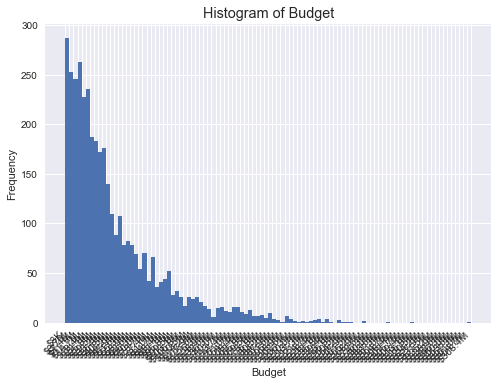

In [33]:
ax = plt.axes()

n, bins, patches = plt.hist(df['budget_adj'], bins = 100)
ax.set_xticks(bins)
ax.xaxis.set_major_formatter(currency)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Budget', ylabel='Frequency',
       title='Histogram of Budget')

Western, Documentary, Foreign, or TV Movie is involved by a very small number of movies. 

### 2.7.3. Vote scores

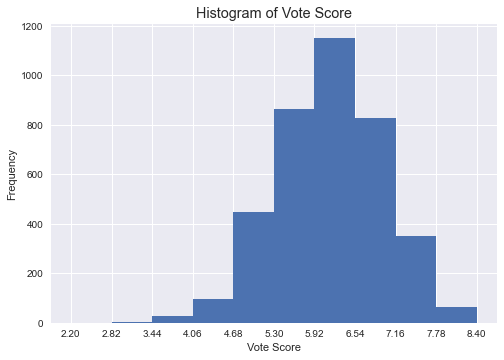

In [34]:
ax = plt.axes()

n, bins, patches = plt.hist(df['vote_average'])
ax.set_xticks(bins)

ax.set(xlabel='Vote Score', ylabel='Frequency',
       title='Histogram of Vote Score');

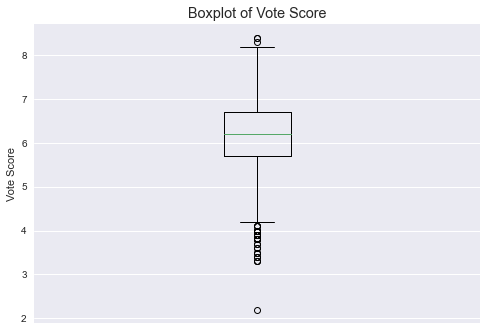

In [35]:
ax = plt.axes()
plt.boxplot(df['vote_average'])
ax.set(ylabel='Vote Score',
       title='Boxplot of Vote Score')

ax.set_xticks([]);

The minimum vote score is quite far away.

### 2.7.4. ROI

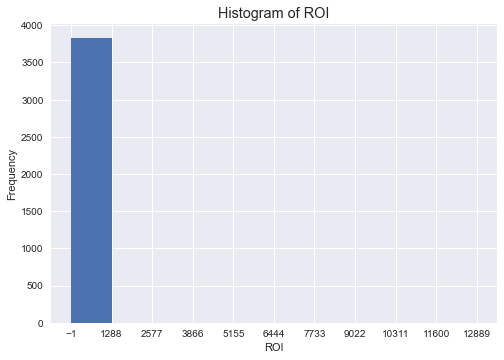

In [36]:
ax = plt.axes()

n, bins, patches = plt.hist(df['ROI'])
ax.set_xticks(bins)

ax.set(xlabel='ROI', ylabel='Frequency',
       title='Histogram of ROI');

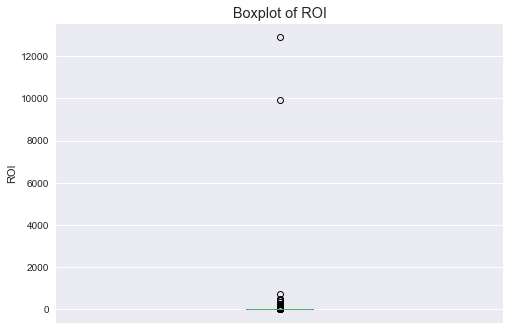

In [37]:
ax = plt.axes()
plt.boxplot(df['ROI'])
ax.set(ylabel='ROI',
       title='Boxplot of ROI')

ax.set_xticks([]);

In [38]:
# Comparison with the next smaller datapoint
temp = df['ROI'].sort_values(ascending = False).reset_index()
temp['ratio'] = temp['ROI'] / temp['ROI'].shift(-1)
temp.head(15)

,index,ROI,ratio
0,7447,12889.386667,1.299464
1,2449,9919.000000,14.190272
2,1354,699.000000,1.400802
3,7277,499.000000,1.137668
4,7178,438.616585,1.030477
5,242,425.644100,1.014591
6,7057,419.522723,1.158752
7,9762,362.047059,1.454004
8,7827,249.000000,1.071736
9,10759,232.333333,1.580444


I am going to remove the top two data points. 

### 2.7.5. Remove outliers

I identified data points to remove through the inspection above. The following will be done:
1. With regard to genres, I noted that 'Western', 'Documentary', 'Foreign', and 'TV Movie' were involved by a quite small number of movies. I will remove records involving these genres.
2. Vote score --> The minimum value data point was significantly low that it will be excluded. 
3. ROI --> The top two values were significantly large that they will be excluded. 

In [39]:
# (1) Remove movies involving 'Western', 'Documentary', 'Foreign', or 'TV Movie'

def remove_genres(x, genre_list):
    for item in x:
        if item in genre_list:
            return True
    return False

s = df.genres.apply(remove_genres, \
genre_list = ['Western', 'Documentary', 'Foreign', 'TV Movie'])

df = df[~s]

In [40]:
df_long = df.explode('genres')
df_long['genres'].value_counts()

Drama              1705
Comedy             1329
Thriller           1186
Action             1050
Adventure           724
Romance             652
Crime               644
Science Fiction     516
Horror              458
Family              416
Fantasy             391
Mystery             341
Animation           197
Music               126
History             123
War                 116
Name: genres, dtype: int64

In [41]:
df.shape

(3731, 10)

In [42]:
# (2) Remove a movie with the minimum vote average

df = df[df['vote_average'] > df['vote_average'].min()]
df.shape

(3730, 10)

In [43]:
# (3) Remove ROI outliers

df = df[df.ROI.apply(lambda x: True if x < 8000 else False)]
df.shape

(3728, 10)

# 3. Explore Individual Variables<a class="anchor" id="ch3"></a>

## 3.1. Budget

In [44]:
df['budget_adj'].describe()

count    3.728000e+03
mean     4.468449e+07
std      4.437056e+07
min      8.081118e+03
25%      1.360327e+07
50%      3.039101e+07
75%      6.087715e+07
max      3.683713e+08
Name: budget_adj, dtype: float64

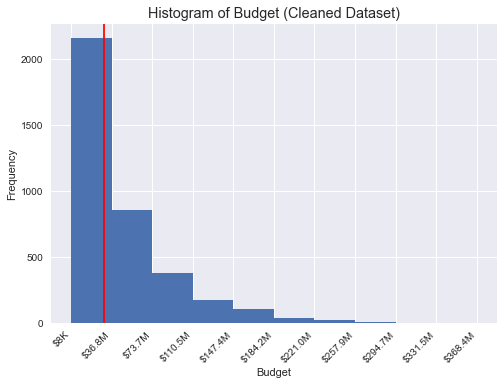

In [45]:
ax = plt.axes()

n, bins, patches = plt.hist(df['budget_adj'])
ax.set_xticks(bins)
ax.xaxis.set_major_formatter(currency)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Budget', ylabel='Frequency',
       title='Histogram of Budget (Cleaned Dataset)')

ax.axvline(x = df['budget_adj'].median(), color = 'r', label = 'median');

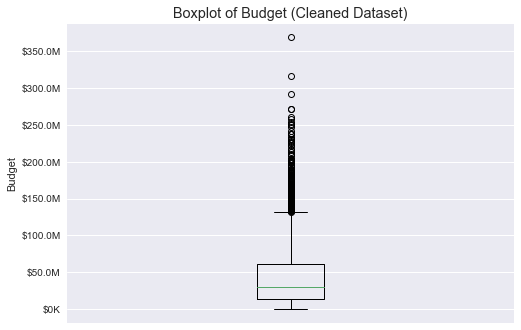

In [46]:
ax = plt.axes()
plt.boxplot(df['budget_adj'])
ax.set(ylabel='Budget',
       title='Boxplot of Budget (Cleaned Dataset)')
ax.yaxis.set_major_formatter(currency)
ax.set_xticks([]);

In [47]:
# Divide into 4 according to budget
qt = df['budget_adj'].quantile([0.25, 0.5, 0.75])

def binning4(x):
    if x < qt[0.25]:
        return "Low"
    elif (x >= qt[0.25]) & (x < qt[0.5]):
        return "Moderate"
    elif (x >= qt[0.5]) & (x < qt[0.75]):
        return 'Little High'
    elif x >= qt[0.75]:
        return 'High'
    
df['budget_level'] = df['budget_adj'].apply(binning4)

In [48]:
# Set values as categories; this will make sure outputs are arranged in this order.
sorter = ['Low', 'Moderate', 'Little High', 'High']
df['budget_level'] = df['budget_level'].astype("category")
df['budget_level'].cat.set_categories(sorter, inplace=True)

In [49]:
df.groupby('budget_level')['id'].count()

budget_level
Low            932
Moderate       931
Little High    933
High           932
Name: id, dtype: int64

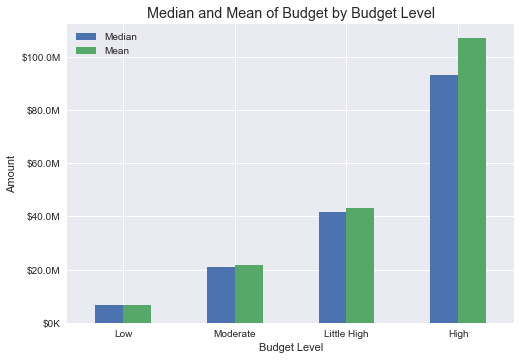

In [50]:
ax = plt.axes()

pd.DataFrame({'Median': df.groupby('budget_level')['budget_adj'].median(), \
              'Mean': df.groupby('budget_level')['budget_adj'].mean()}\
            ).plot.bar(ax = ax)

ax.yaxis.set_major_formatter(currency)
ax.set_xticklabels(sorter, rotation=0)
ax.set(xlabel='Budget Level', ylabel='Amount',
       title='Median and Mean of Budget by Budget Level');

## 3.2. ROI

In [51]:
df['ROI'].describe()

count    3728.000000
mean        4.096601
std        21.105841
min        -1.000000
25%        -0.119730
50%         1.121400
75%         3.185074
max       699.000000
Name: ROI, dtype: float64

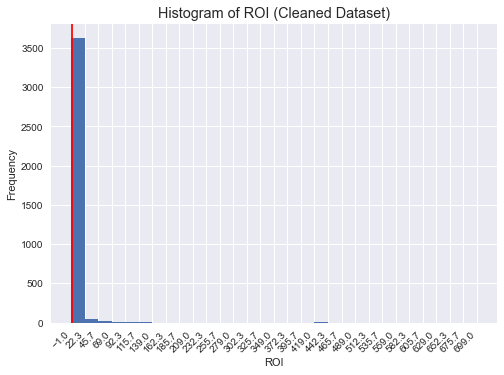

In [52]:
ax = plt.axes()

n, bins, patches = plt.hist(df['ROI'], bins = 30)
ax.set_xticks(bins)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='ROI', ylabel='Frequency',
       title='Histogram of ROI (Cleaned Dataset)')

ax.axvline(x = df['ROI'].median(), color = 'r', label = 'median');

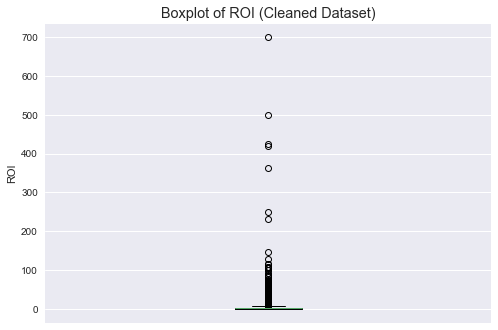

In [53]:
ax = plt.axes()
plt.boxplot(df['ROI'])
ax.set(ylabel='ROI',
       title='Boxplot of ROI (Cleaned Dataset)')

ax.set_xticks([]);

In [54]:
qt = df['ROI'].quantile([0.25, 0.5, 0.75])
df['ROI_level'] = df['ROI'].apply(binning4)

In [55]:
sorter = ['Low', 'Moderate', 'Little High', 'High']
df['ROI_level'] = df['ROI_level'].astype("category")
df['ROI_level'].cat.set_categories(sorter, inplace=True)

In [56]:
df.groupby('ROI_level')['id'].count()

ROI_level
Low            932
Moderate       932
Little High    932
High           932
Name: id, dtype: int64

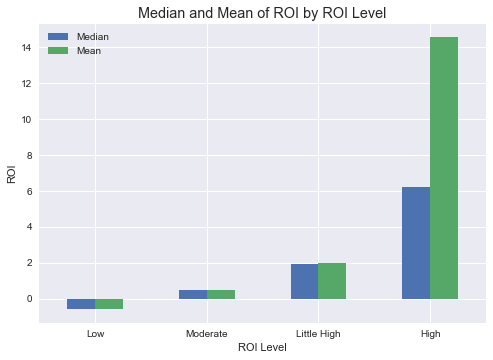

In [57]:
ax = plt.axes()
pd.DataFrame({'Median': df.groupby('ROI_level')['ROI'].median(), \
              'Mean': df.groupby('ROI_level')['ROI'].mean()}\
            ).plot.bar(ax = ax)

ax.set_xticklabels(sorter, rotation=0)
ax.set(xlabel='ROI Level', ylabel='ROI',
       title='Median and Mean of ROI by ROI Level');

## 3.3. Genres

In [58]:
df_long = df.explode('genres')
temp = df_long['genres'].value_counts()

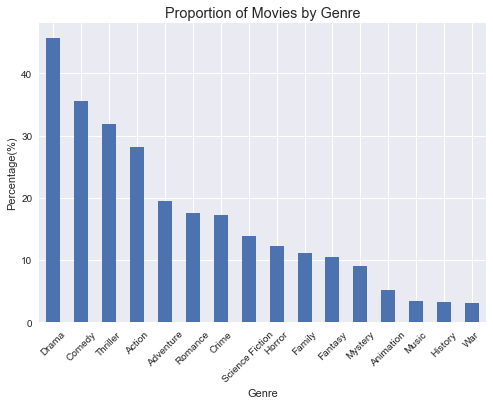

In [59]:
ax = plt.axes()

temp = temp/len(df)*100
temp.plot(kind = 'bar')

ax.tick_params(axis='x', labelrotation=45)
ax.set(xlabel='Genre', ylabel='Percentage(%)',
       title='Proportion of Movies by Genre');

## 3.4. Vote score

In [60]:
df['vote_average'].describe()

count    3728.000000
mean        6.162312
std         0.791082
min         3.300000
25%         5.600000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

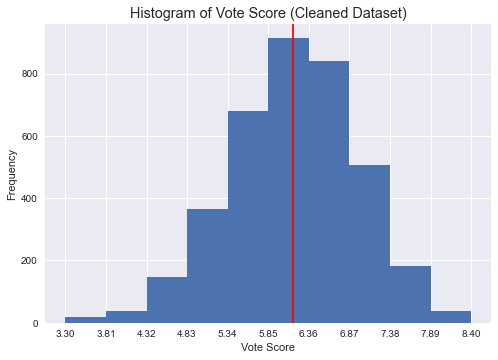

In [61]:
ax = plt.axes()

n, bins, patches = plt.hist(df['vote_average'])
ax.set_xticks(bins)

ax.set(xlabel='Vote Score', ylabel='Frequency',
       title='Histogram of Vote Score (Cleaned Dataset)')
ax.axvline(x = df['vote_average'].mean(), color = 'r', label = 'mean');

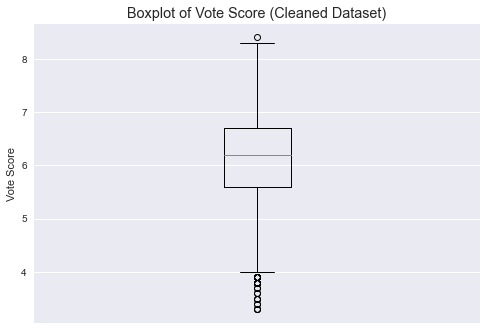

In [62]:
ax = plt.axes()
plt.boxplot(df['vote_average'])
ax.set(ylabel='Vote Score',
       title='Boxplot of Vote Score (Cleaned Dataset)')

ax.set_xticks([]);

# 4. Did high budget movies achieve high ROI? (Q1)<a class="anchor" id="ch4"></a>

To explore relationships, I will make:
1. scatter plot
2. ROI distribution by budget level,
3. bar chart of ROI media/mean by budget level, and
4. contingency table of ROI and budget levels.

## 4.1. Scatter plot

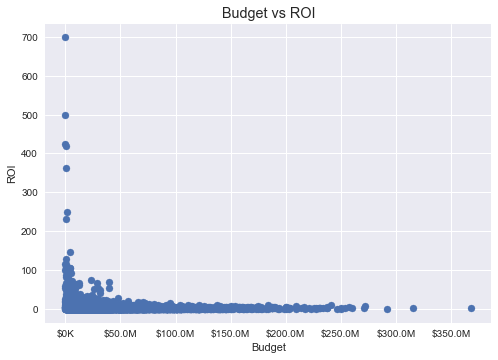

In [63]:
ax = plt.axes()
plt.scatter(x=df['budget_adj'], y=df['ROI'])
ax.set(xlabel = "Budget", ylabel='ROI',
       title='Budget vs ROI')

ax.xaxis.set_major_formatter(currency)

## 4.2. ROI distribution by budget level

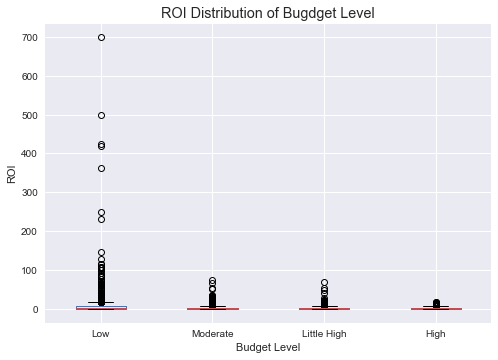

In [64]:
temp = df.assign(index=df.groupby('budget_level').cumcount())\
    .pivot('index','budget_level','ROI')

ax = temp.plot(kind='box')
ax.set(xlabel = "Budget Level", ylabel='ROI',
       title='ROI Distribution of Bugdget Level');

## 4.3. ROI media/mean by budget level

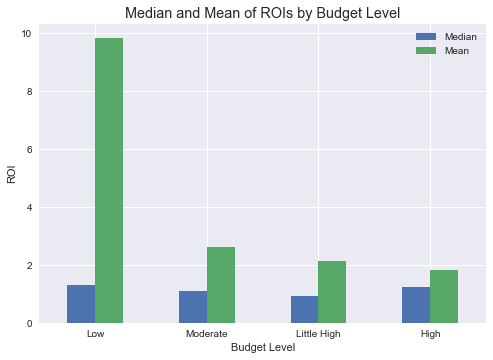

In [65]:
ax = plt.axes()
ax = pd.DataFrame({'Median': df.groupby('budget_level')['ROI'].median(), \
              'Mean': df.groupby('budget_level')['ROI'].mean()}\
            ).plot.bar(ax = ax)

ax.set_xticklabels(sorter, rotation=0)
ax.set(xlabel='Budget Level', ylabel='ROI',
       title='Median and Mean of ROIs by Budget Level');

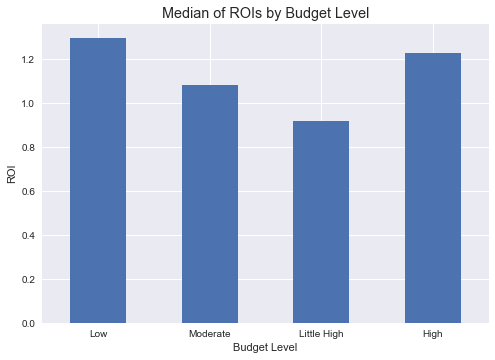

In [66]:
ax = df.groupby('budget_level')['ROI'].median().plot(kind = 'bar')

ax.set_xticklabels(sorter, rotation=0)
ax.set(xlabel='Budget Level', ylabel='ROI',
       title='Median of ROIs by Budget Level')
ax.tick_params(axis='x')

## 4.4. Contingency table of ROI and budget level

In [67]:
# Contingency table
temp = pd.crosstab(df['budget_level'], df['ROI_level'])
temp = temp[['Low', 'Moderate', 'Little High', 'High']]
temp

ROI_level,Low,Moderate,Little High,High
budget_level,,,,
Low,298,149,141,344
Moderate,239,236,230,226
Little High,234,270,248,181
High,161,277,313,181


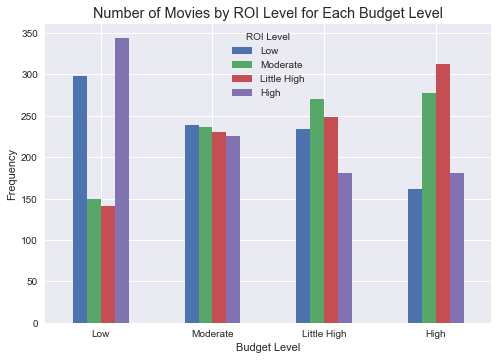

In [68]:
ax = temp.plot(kind ='bar')
ax.set_xticklabels(sorter, rotation=0)
ax.set(xlabel='Budget Level', ylabel='Frequency',
       title='Number of Movies by ROI Level for Each Budget Level')
ax.tick_params(axis='x')
plt.legend(title="ROI Level");

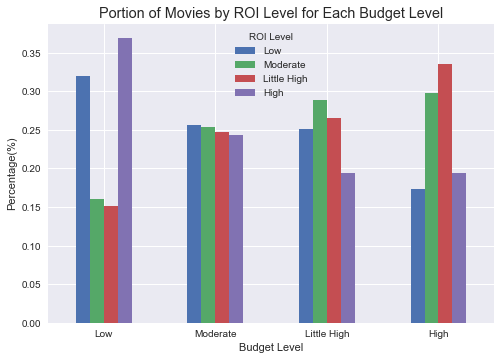

In [69]:
# To get ratio to the total number of movies of the budget level
# e.g., over 35 percent of the low budget level movies led to the high ROI level. 
ax = temp.apply(lambda x: x / sum(x), axis = 1).plot(kind ='bar')
ax.set_xticklabels(sorter, rotation=0)
ax.set(xlabel='Budget Level', ylabel='Percentage(%)',
       title='Portion of Movies by ROI Level for Each Budget Level')
ax.tick_params(axis='x')
plt.legend(title="ROI Level");

## 4.5. Findings

With exploration of the outputs, I noted the following:

* The scatter plot shows no association between the budget and ROI.
* The ROI boxplots by the budget level shows that ROI values of low budget movies span a wide range, up to 500, the largest ROI value in the dataset. The larger budget groups have the narrower spread of ROIs.
* The low and high budget levels show a little higher median values than the moderate and little high budget levels.
* The contigency table reveals that the low budget movies achieve the low and high level ROIs more frequently than the moderate and little high level ROIs. As opposed to it, the high budget movies obtain the moderate and little high level ROIs more frequenlty.

# 5. Did specific genres lead to high ROI? (Q2)<a class="anchor" id="ch5"></a>

To compare ROIs between the genres, I am going to calculate two types of means:
1. Simply add up all ROIs and divide it with the total number of movies involving that genre. 
2. Assign weights based on the number genre types involved in a movie. A ROI is multiplied by 1/number_of_genres and the sum is divided by the sum of 1/number_of_genres values. 

For example, let's assume we have a long format dataframe of three movies as below:

| id | genre | ROI | number of genres|
|----|-------|-----|-----------------|
| 1  |drama  | 3   |2|
| 1  |comedy | 3   |2|
| 2  |comedy | 5   |1|
| 3  |drama  | 2   |1|

Simple means are:
- drama, (3+2) / 2 = 2.5
- comedy, (3+5) / 2 = 4

Weighted means are:
- drama, (3x1/2+2x1/1) / (1/2+1) = (1.5+2) / 1.5 = 2.33
- comedy, (3x1/2+5x1/1) / (1/2+1) = (1.5+5) / 1.5 = 4.33

## 5.1. Prep before calculation

In [70]:
# Create 'genre_num' column that holds the number of genres involved by each movie; 
# it will be used in 'weighted' means
df['genre_num'] = df.apply(lambda x: len(x.genres), axis=1)

In [71]:
df_long = df.explode('genres')

In [72]:
temp = df_long.loc[:, ['id', 'genres', 'ROI', 'genre_num']]

In [73]:
md = temp.groupby('genres').apply(lambda x: x.ROI.median()).\
sort_values(ascending = False)
md

genres
Animation          1.787321
Horror             1.535396
Family             1.471329
Music              1.414592
Adventure          1.228904
War                1.203342
Comedy             1.175302
Romance            1.126615
Fantasy            1.103953
Science Fiction    1.079177
Action             1.038890
Thriller           1.027138
Crime              0.899671
History            0.856018
Drama              0.836353
Mystery            0.752976
dtype: float64

## 5.2. Calculate simple means

In [74]:
# Get 'simple' means of the genres
sm = temp.groupby('genres').apply(lambda x: x.ROI.mean()).\
sort_values(ascending = False)
sm

genres
Horror             9.529985
Music              5.566142
Science Fiction    4.594290
Thriller           4.282754
Fantasy            4.197815
Drama              3.694341
Comedy             3.679025
Animation          3.311270
Adventure          3.292626
Romance            3.251800
Family             3.053484
Action             2.576874
Crime              2.464268
War                2.408784
Mystery            2.394830
History            1.999365
dtype: float64

## 5.3. Calculate weighted means

In [75]:
# Get 'weighted' means of the genres
temp['ROI_w'] = temp.apply(lambda x: x.ROI * (1/x.genre_num), axis = 1)
wm = temp.groupby('genres').apply(lambda x: sum(x.ROI_w) / sum(1/x.genre_num)).\
sort_values(ascending = False)
wm

genres
Horror             10.823002
Music               5.653756
Thriller            4.864953
Comedy              4.419165
Science Fiction     4.410199
Fantasy             3.871349
Drama               3.733721
Adventure           3.331995
Romance             3.301200
Animation           3.171698
Family              2.949379
Crime               2.580112
Mystery             2.543738
Action              2.530919
War                 2.341836
History             2.265147
dtype: float64

## 5.4. Findings
The below charts show that results of the two methods are not identical, but the order of genres are the same: 
* 'Horror' genre is quite contrastively the most profitable in terms of ROI,
* The next profitable genre is 'Music' by round 4 or 5 smaller ROI than Horror,
* The ROI values gradually decrease after that, and thus the difference between 'Music' and 'History' is only about 3.5. 

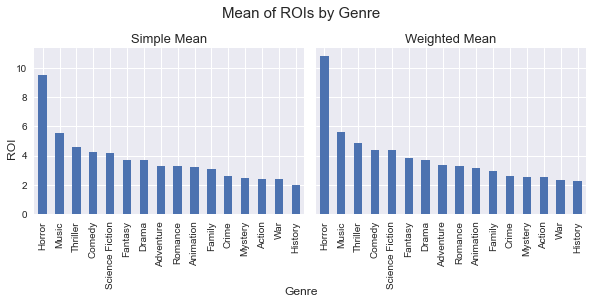

In [76]:
# Compare the 'simple' and 'weighted' means
fig, axs = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True, sharex=True, sharey=True,)
sm.plot(kind = 'bar', ax = axs[0])
wm.plot(kind = 'bar', ax = axs[1])

fig.suptitle("Mean of ROIs by Genre", size = 15)

axs[0].set_title('Simple Mean', size=13)
axs[1].set_title('Weighted Mean', size=13)

axs[0].xaxis.label.set_visible(False)
axs[1].xaxis.label.set_visible(False)

fig.text(0.5, -0.01, 'Genre', ha='center', size = 12)
fig.text(-0.01, 0.5, 'ROI', va='center', rotation='vertical', size = 12);

# 6. Did high score movies achieve high ROI? (Q3)<a class="anchor" id="ch6"></a>

## 6.1. Scatter plot

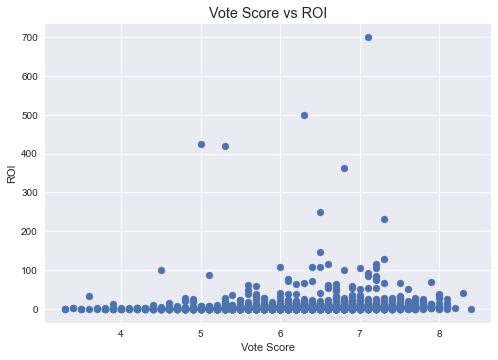

In [77]:
ax = plt.axes()
plt.scatter(x = df['vote_average'], y=df['ROI'])
ax.set(xlabel = "Vote Score", ylabel='ROI',
      title='Vote Score vs ROI');

## 6.2. Vote scores by the ROI level

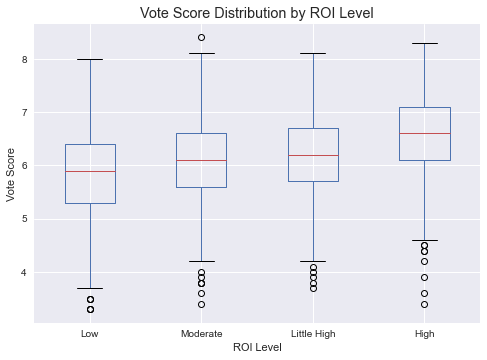

In [78]:
ax = df.assign(index=df.groupby('ROI_level').cumcount()).\
    pivot('index','ROI_level','vote_average').plot(kind='box')
ax.set(xlabel = "ROI Level", ylabel='Vote Score',
       title='Vote Score Distribution by ROI Level');

In [79]:
df.groupby('ROI_level')['vote_average'].median()

ROI_level
Low            5.9
Moderate       6.1
Little High    6.2
High           6.6
Name: vote_average, dtype: float64

## 6.3. Findings
With the scatter plot I do not find association between the vote average score and ROI. Vote scores by the ROI level show that the high ROI level movies led to a little higher scores, by about 0.7 (low ROI level, mean=5.8; high ROI level, mean= 6.5).

# 7. Conclusions<a class="anchor" id="ch7"></a>

## 7.1. Summary
With the exploration, I found association between 1) budget size and ROI, 2) genres and ROI, and 3) vote average score and ROI. The following reports summary of each association:
- I found contrary behavior between the low and high budget groups, in terms of their ROIs. Low budget movies are more likely to be big fail or big success, and high budget movies tend to end up in the middle. Considering different capabilities in reaching the audience and the definition of ROI, the result makes sense. 
- The genre type that brought the highest ROI on average is 'Horror', and the smallest ROI, 'History',  among 17 genre types (after excluding 'Western', 'Documentary', 'Foreign', and 'TV Movie'). 
- It was found that the higher ROI level group tends to associate with higher vote score.

Based on the above findings, it is considered that production of low budget, horror movies that receive high score from the audience is likely to lead to high ROI.

## 7.2. Limitation
The exploration has several limitations as follows:
- Only about a third of the original datapoints were used in the analysis, since the rest had missing or outlying values. As well, there was no further work to check if any pattern exists in missing or outlying values.
- In finding association between genres and ROIs, the effect of genre combination was not explored. For instance, let's assume the following dataset of four movies:

| id | genres| ROI |
|----|-------|-----|
|1|Drama|2|
|2|Drama, Family|8|
|3|Drama, Horror|8|
|4|Family|2|

Calculation of weighted means indicates that the highest ROI genre is Horror (Drama, 5; Family 4; Horor, 8). If looking at the dataset, however, it is not sure if this is the power of the Horror genre or result of pairing with Drama, since it does not have movies that are described with only Horror.  

## 7.3. Additional research questions
The following presents questions whose answers may reveal deeper knowledge on relationships between the properties:
- Is there association between budgets and genre types?
- Is there association between budgets and vote scores?
- Is there association between genre types and vote scores?